# First script to play with Forest Cover Type Prediction problem

## 1. Load in the data and visualization

In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

% matplotlib inline

pd.options.display.max_columns = 50
pd.options.display.max_colwidth = 100
sns.set_style('whitegrid')

In [3]:
import xgboost as xgb

C:\Users\xinliu\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
datPath = ('H:\Document\Program\Kaggle\Forest Cover Type Prediction\data\\')
trainFile = 'train.csv'
testFile = 'test.csv'

trainData = pd.read_csv(datPath + trainFile)
testData = pd.read_csv(datPath + testFile)

In [5]:
print(len(trainData.columns))
print(trainData.shape)
print(trainData.columns)

56
(15120, 56)
Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_

In [6]:
# drop the Id column which is useless for data analysis
trainData.drop('Id', 1, inplace=True)
testData.drop('Id', 1, inplace=True);
#trainData.drop(label='Id')

In [7]:
trainData.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,...,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,0.237897,0.033003,0.419907,0.309193,0.023479,0.041204,0.063624,0.055754,0.010913,0.042989,0,0.000066,0.000661,0.141667,0.026852,...,0.040476,0.003968,0.003042,0.009193,0.001058,0.022817,0.050066,0.016997,0.000066,0.003571,0.000992,0.000595,0.085384,0.047950,0.021958,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,0.425810,0.178649,0.493560,0.462176,0.151424,0.198768,0.244091,0.229454,0.103896,0.202840,0,0.008133,0.025710,0.348719,0.161656,...,0.197080,0.062871,0.055075,0.095442,0.032514,0.149326,0.218089,0.129265,0.008133,0.059657,0.031482,0.024391,0.279461,0.213667,0.146550,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,1988.250000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [8]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15120 entries, 0 to 15119
Data columns (total 55 columns):
Elevation                             15120 non-null int64
Aspect                                15120 non-null int64
Slope                                 15120 non-null int64
Horizontal_Distance_To_Hydrology      15120 non-null int64
Vertical_Distance_To_Hydrology        15120 non-null int64
Horizontal_Distance_To_Roadways       15120 non-null int64
Hillshade_9am                         15120 non-null int64
Hillshade_Noon                        15120 non-null int64
Hillshade_3pm                         15120 non-null int64
Horizontal_Distance_To_Fire_Points    15120 non-null int64
Wilderness_Area1                      15120 non-null int64
Wilderness_Area2                      15120 non-null int64
Wilderness_Area3                      15120 non-null int64
Wilderness_Area4                      15120 non-null int64
Soil_Type1                            15120 non-null int64
Soil_T

In [9]:
# Firstly, we retrive the response variables and see if this is a 
# binary classes classification problem or a multi-classes classification problem
trainData_y = trainData['Cover_Type']

# this is a multi-classes classification problem
trainData_y.value_counts()

7    2160
6    2160
5    2160
4    2160
3    2160
2    2160
1    2160
Name: Cover_Type, dtype: int64

In [10]:
# see how many features we have 
numFeature = len(trainData.columns)

# see do we have any missing data
colNA = np.where(trainData.isnull().values.mean(axis=0))

# see which features do we have
colNA

(array([], dtype=int64),)

# Learning :
 No attribute is missing as count is 15120 for all attributes. Hence, all rows can be used
 Negative value(s) present in Vertical_Distance_To_Hydrology. Hence, some tests such as chi-sq cant be used.
 Wilderness_Area and Soil_Type are one hot encoded. Hence, they could be converted back for some analysis
 Attributes Soil_Type7 and Soil_Type15 can be removed as they are constant
 Scales are not the same for all. Hence, rescaling and standardization may be necessary for some algorithms

In [11]:
# we have ten numerical features
numericFeature = pd.DataFrame()
featureArr = np.arange(0,numFeature)


def numericFeature(df):
    numFeature = len(df.columns)
    featureName = df.columns
    for n in np.arange(numFeature):
        if len(df[featureName[n]].value_counts()) > 2:
            return 1
        else:
            return 0
        
        

In [12]:
#numericFeature['numeric'] = trainData[featureName[0]].map(lambda train: train.value_counts())

In [15]:
colName =trainData.columns
len(trainData[colName[40]].value_counts())

2

In [16]:
colName = trainData.columns
dataType = {}
uniqueValVarNum = 0
uniqueValVarName = []
categoricValVarNum = 0
categoricValVarName = []
binaryValVarNum = 0
binaryValVarName = []
for n in np.arange(len(colName)):
    numVarVal = len(trainData[colName[n]].value_counts())
    if numVarVal > 2:
        dataType[colName[n]] = ['Categorical/Numeric', numVarVal]
        categoricValVarNum += 1
        categoricValVarName.append(colName[n])
    elif (0<= numVarVal) and (numVarVal < 2):
        dataType[colName[n]] = ['Unique', 1]
        uniqueValVarNum += 1
        uniqueValVarName.append(colName[n])
    else:
        dataType[colName[n]] = ['Binary', 2]
        binaryValVarNum += 1
        binaryValVarName.append(colName[n])

In [17]:
dataType

{'Aspect': ['Categorical/Numeric', 361],
 'Cover_Type': ['Categorical/Numeric', 7],
 'Elevation': ['Categorical/Numeric', 1665],
 'Hillshade_3pm': ['Categorical/Numeric', 247],
 'Hillshade_9am': ['Categorical/Numeric', 176],
 'Hillshade_Noon': ['Categorical/Numeric', 141],
 'Horizontal_Distance_To_Fire_Points': ['Categorical/Numeric', 2710],
 'Horizontal_Distance_To_Hydrology': ['Categorical/Numeric', 400],
 'Horizontal_Distance_To_Roadways': ['Categorical/Numeric', 3250],
 'Slope': ['Categorical/Numeric', 52],
 'Soil_Type1': ['Binary', 2],
 'Soil_Type10': ['Binary', 2],
 'Soil_Type11': ['Binary', 2],
 'Soil_Type12': ['Binary', 2],
 'Soil_Type13': ['Binary', 2],
 'Soil_Type14': ['Binary', 2],
 'Soil_Type15': ['Unique', 1],
 'Soil_Type16': ['Binary', 2],
 'Soil_Type17': ['Binary', 2],
 'Soil_Type18': ['Binary', 2],
 'Soil_Type19': ['Binary', 2],
 'Soil_Type2': ['Binary', 2],
 'Soil_Type20': ['Binary', 2],
 'Soil_Type21': ['Binary', 2],
 'Soil_Type22': ['Binary', 2],
 'Soil_Type23': ['Bi

In [18]:
uniqueValVarName

['Soil_Type7', 'Soil_Type15']

because we have two variables are having only one possible value, hence we can safely remove these two variables during analysis

In [19]:
for name in uniqueValVarName:
    trainData.drop(name, axis=1, inplace=True)
    testData.drop(name, axis=1, inplace=True)

In [20]:
trainDataCorr = trainData.corr()

In [21]:
print(trainData.shape)
print(trainDataCorr.shape)

(15120, 53)
(53, 53)


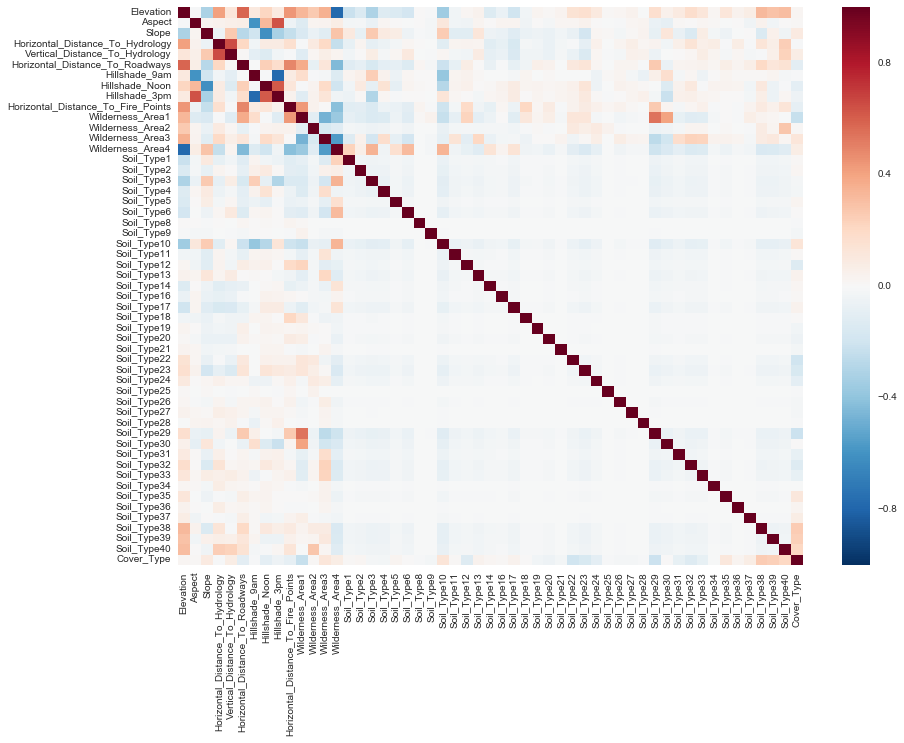

In [22]:
# This is misleading, because the correlation requires continous data where we also consider the binary variables as well.
plt.figure(figsize=(14,10))
sns.heatmap(trainDataCorr);

### data skewness

 Values close to 0 show less skewness. And several attributes in Soil_Type show a large skew. Hence, some algorithms may benefit if skewness is corrected.

In [23]:
trainDataSkewness = trainData.skew()
trainDataSkewness.sort_values(ascending=False, inplace=True)

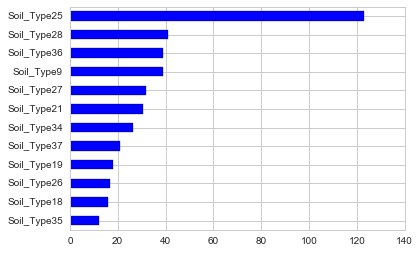

In [24]:
trainDataSkewness[::-1][40:-1].plot(kind='barh')

## data correlation
Correlation tells relation between two attributes. Correlation requires continous data. Hence, ignore Wilderness_Area and Soil_Type as they are binary

In [25]:
trainData_categoric = trainData[categoricValVarName]
#trainData_categoric.describe()

In [26]:
trainData_categoric_corr = trainData_categoric.corr()

In [27]:
trainData_categoric_corr

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type
Elevation,1.000000,-0.011096,-0.312640,0.412712,0.122092,0.578659,0.097900,0.215782,0.089518,0.443563,0.016090
Aspect,-0.011096,1.000000,0.028148,0.040732,0.056412,0.066184,-0.593997,0.324912,0.635022,-0.052169,0.008015
Slope,-0.312640,0.028148,1.000000,-0.055976,0.265314,-0.277049,-0.200072,-0.612613,-0.326887,-0.239527,0.087722
Horizontal_Distance_To_Hydrology,0.412712,0.040732,-0.055976,1.000000,0.652142,0.203397,-0.033803,0.080047,0.080833,0.158817,-0.010515
Vertical_Distance_To_Hydrology,0.122092,0.056412,0.265314,0.652142,1.000000,0.011555,-0.095930,-0.132948,-0.035559,-0.015048,0.075647
Horizontal_Distance_To_Roadways,0.578659,0.066184,-0.277049,0.203397,0.011555,1.000000,-0.003398,0.240684,0.173882,0.486386,-0.105662
Hillshade_9am,0.097900,-0.593997,-0.200072,-0.033803,-0.095930,-0.003398,1.000000,-0.013712,-0.779965,0.078144,-0.010286
Hillshade_Noon,0.215782,0.324912,-0.612613,0.080047,-0.132948,0.240684,-0.013712,1.000000,0.614526,0.122098,-0.098905
Hillshade_3pm,0.089518,0.635022,-0.326887,0.080833,-0.035559,0.173882,-0.779965,0.614526,1.000000,0.043162,-0.053399
Horizontal_Distance_To_Fire_Points,0.443563,-0.052169,-0.239527,0.158817,-0.015048,0.486386,0.078144,0.122098,0.043162,1.000000,-0.089389


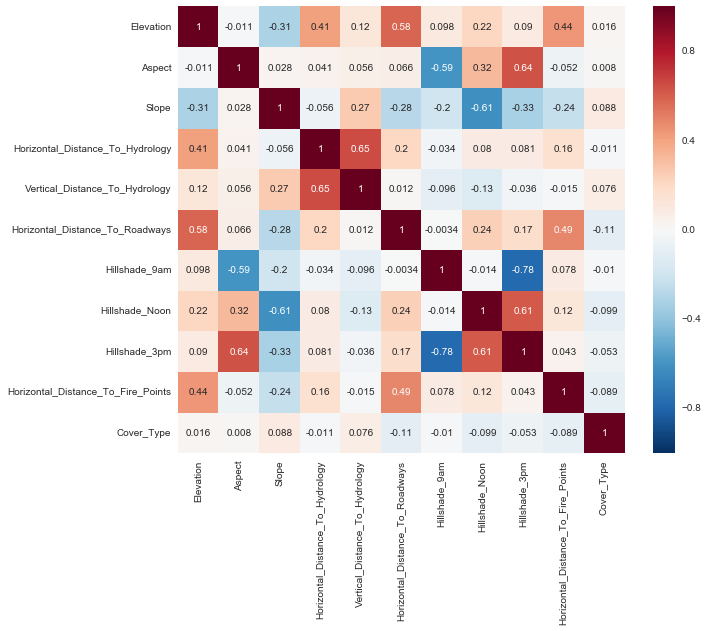

In [28]:
plt.figure(figsize=(10,8))
sns.heatmap(trainData_categoric_corr, annot=True);

In [29]:
idx = np.array(np.where(trainData_categoric_corr > 0.5))
list(zip(idx[0,:], idx[1,:]))

[(0, 0),
 (0, 5),
 (1, 1),
 (1, 8),
 (2, 2),
 (3, 3),
 (3, 4),
 (4, 3),
 (4, 4),
 (5, 0),
 (5, 5),
 (6, 6),
 (7, 7),
 (7, 8),
 (8, 1),
 (8, 7),
 (8, 8),
 (9, 9),
 (10, 10)]

In [30]:
for n, a in enumerate(trainData_categoric_corr):
    print(n, a)

0 Elevation
1 Aspect
2 Slope
3 Horizontal_Distance_To_Hydrology
4 Vertical_Distance_To_Hydrology
5 Horizontal_Distance_To_Roadways
6 Hillshade_9am
7 Hillshade_Noon
8 Hillshade_3pm
9 Horizontal_Distance_To_Fire_Points
10 Cover_Type


In [31]:
trainData_categoric_corr.shape

(11, 11)

In [33]:
corrInfo = {}
idx = {}
for n, a in enumerate(trainData_categoric_corr.values):
    #print(trainData_categoric_corr.columns[n], a, a.argsort())
    idxTemp = np.array(np.argwhere(a > 0.5))
    print(idxTemp )
    idx[n] = idxTemp
    #corrInfo[trainData_categoric_corr.columns[n]] = trainData_categoric_corr.iloc[n, ]
    #print(n, trainData_categoric_corr.columns[n], a, np.argwhere(a > 0.5), np.argwhere(a < -0.5))

[[0]
 [5]]
[[1]
 [8]]
[[2]]
[[3]
 [4]]
[[3]
 [4]]
[[0]
 [5]]
[[6]]
[[7]
 [8]]
[[1]
 [7]
 [8]]
[[9]]
[[10]]


In [34]:
idx[3][:,0]

array([3, 4], dtype=int64)

In [35]:
# List of pairs along with correlation above threshold
corr_list = []
threshold = 0.5
#Search for the highly correlated pairs
for i in range(0,trainData_categoric_corr.shape[0]): #for 'size' features
    for j in range(i+1,trainData_categoric_corr.shape[0]): #avoid repetition
        if (trainData_categoric_corr.iloc[i,j] >= threshold and trainData_categoric_corr.iloc[i,j] < 1) \
        or (trainData_categoric_corr.iloc[i,j] < 0 and trainData_categoric_corr.iloc[i,j] <= -threshold):
            corr_list.append([trainData_categoric_corr.iloc[i,j],i,j]) #store correlation and columns index

#Sort to show higher ones first            
#s_corr_list = sorted(corr_list, key=lambda x: -abs(x[0]))
s_corr_list = sorted(corr_list)

#Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (trainData_categoric_corr.columns[i],trainData_categoric_corr.columns[j],v))
    
#corr_list

Hillshade_9am and Hillshade_3pm = -0.78
Slope and Hillshade_Noon = -0.61
Aspect and Hillshade_9am = -0.59
Elevation and Horizontal_Distance_To_Roadways = 0.58
Hillshade_Noon and Hillshade_3pm = 0.61
Aspect and Hillshade_3pm = 0.64
Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology = 0.65


#### visualize the categorical variables and response variable

Cover_type VS Hillshade_9am and Hillshade_3pm

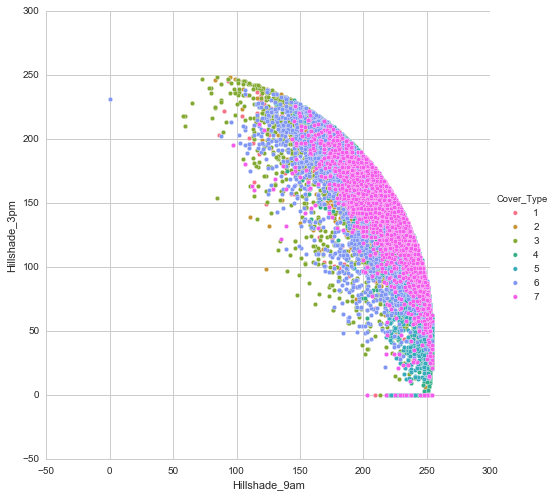

In [36]:
#plt.figure(figsize=(24,10))
sns.FacetGrid(trainData, hue="Cover_Type",size=7).map(plt.scatter, "Hillshade_9am", "Hillshade_3pm", edgecolor="w").add_legend();

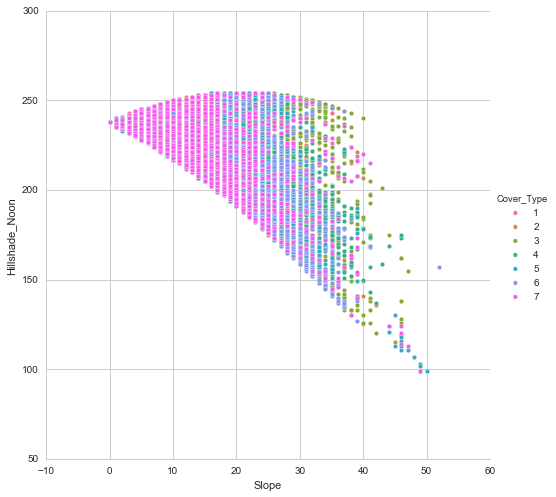

In [37]:
sns.FacetGrid(trainData, hue="Cover_Type",size=7).map(plt.scatter, "Slope",\
                                                      "Hillshade_Noon", edgecolor="w").add_legend();

In [262]:
#for v,i,j in s_corr_list:
#    sns.FacetGrid(trainData, hue="Cover_Type",size=6).map(plt.scatter,trainData_categoric_corr.columns[i],\
#                                                          trainData_categoric_corr.columns[j], edgecolor="w").add_legend();

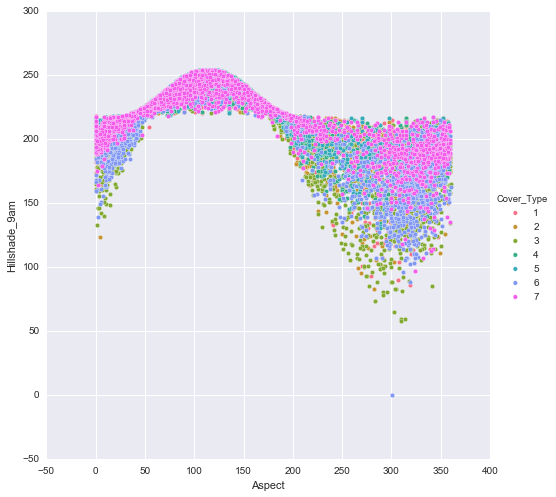

In [264]:
sns.FacetGrid(trainData, hue="Cover_Type",size=7).map(plt.scatter, "Aspect", "Hillshade_9am", edgecolor="w").add_legend();

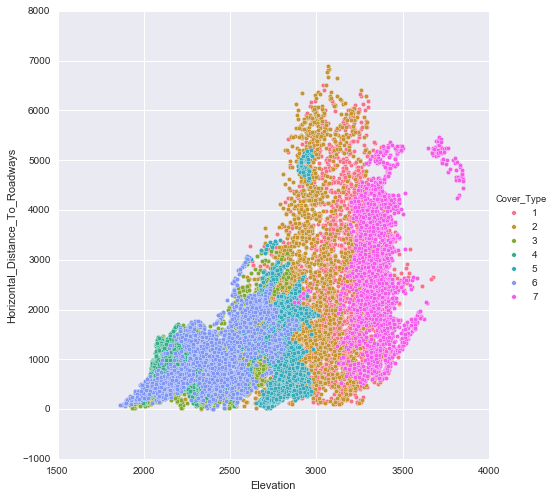

In [265]:
sns.FacetGrid(trainData, hue="Cover_Type",size=7).map(plt.scatter, "Elevation", \
                                                      "Horizontal_Distance_To_Roadways", edgecolor="w").add_legend();

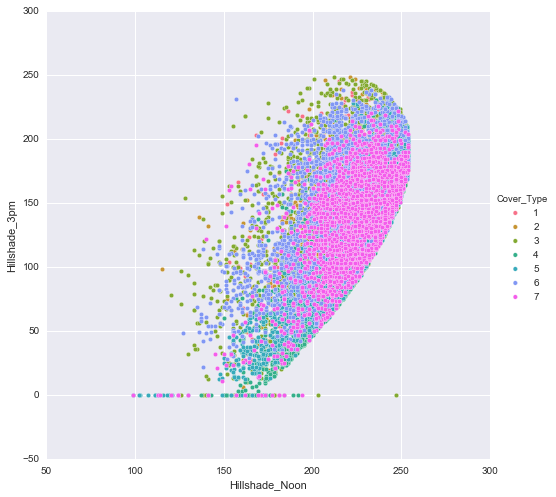

In [266]:
sns.FacetGrid(trainData, hue="Cover_Type",size=7).map(plt.scatter, "Hillshade_Noon", \
                                                      "Hillshade_3pm", edgecolor="w").add_legend();

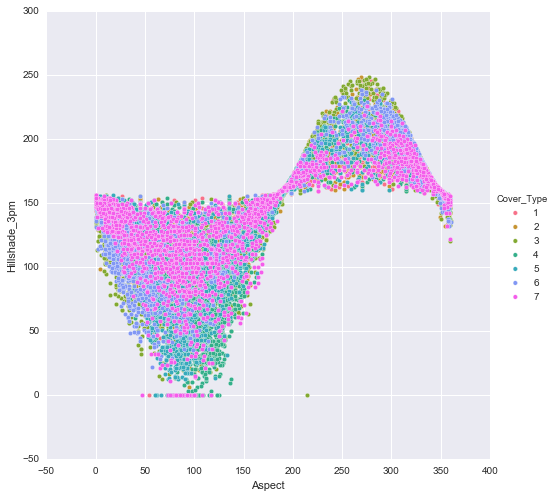

In [267]:
sns.FacetGrid(trainData, hue="Cover_Type",size=7).map(plt.scatter, "Aspect", \
                                                      "Hillshade_3pm", edgecolor="w").add_legend();

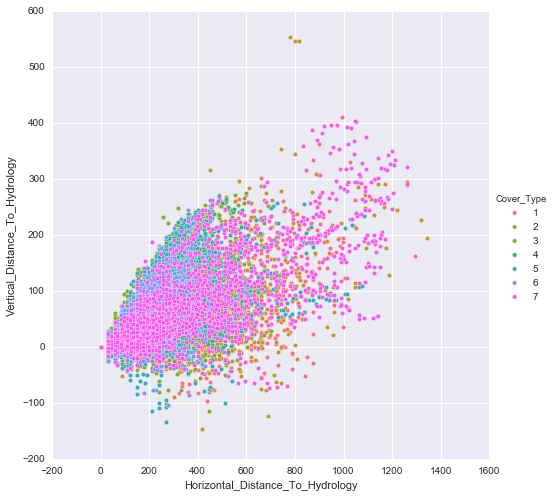

In [268]:
sns.FacetGrid(trainData, hue="Cover_Type",size=7).map(plt.scatter, "Horizontal_Distance_To_Hydrology", \
                                                      "Vertical_Distance_To_Hydrology", edgecolor="w").add_legend();

# Data Visualization

Box and density plots

C:\Users\xinliu\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


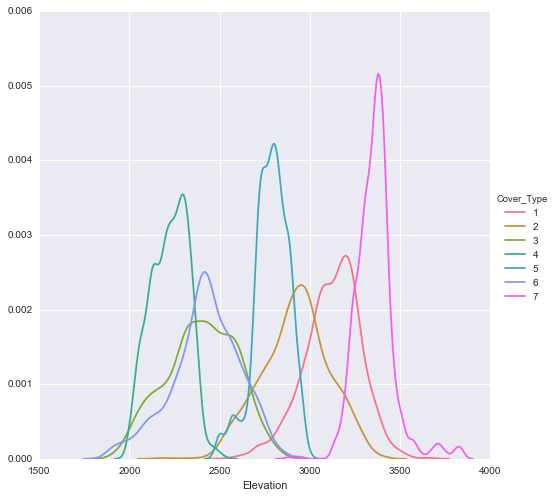

In [280]:
sns.FacetGrid(trainData, hue='Cover_Type', size=7).map(sns.kdeplot, 'Elevation').add_legend()

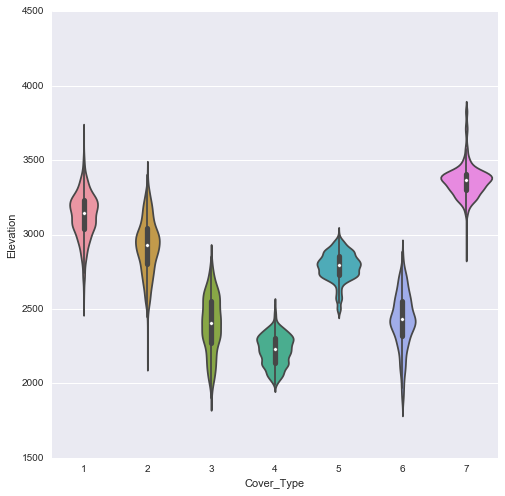

In [287]:
plt.figure(figsize=(8,8))
sns.violinplot(data=trainData, x='Cover_Type',y='Elevation');

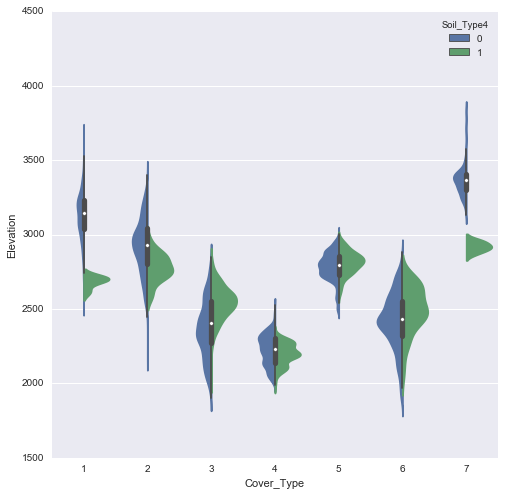

In [291]:
plt.figure(figsize=(8,8))
sns.violinplot(data=trainData, x='Cover_Type', y='Elevation', hue='Soil_Type4', split=True);

C:\Users\xinliu\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


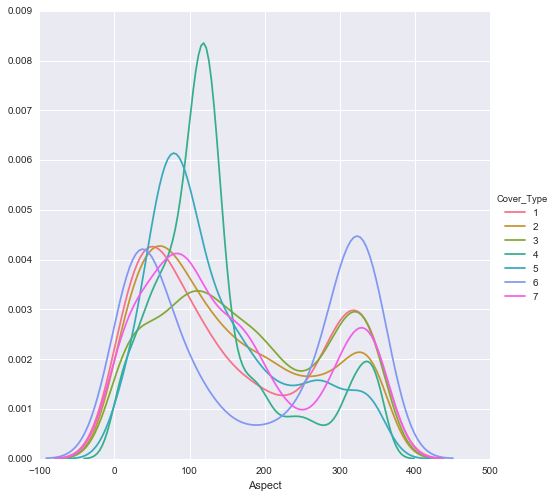

In [293]:
# Gaussian Mixture Model distributed for Aspect of different cover types
sns.FacetGrid(trainData, hue='Cover_Type', size=7).map(sns.kdeplot, 'Aspect').add_legend();

C:\Users\xinliu\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


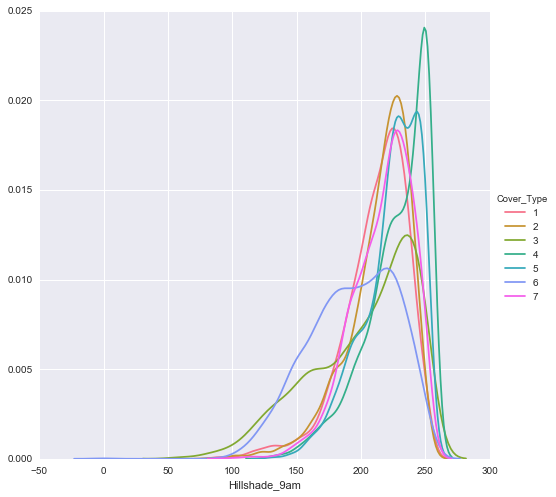

In [294]:
# Right skewed distributed for Aspect of different cover types
sns.FacetGrid(trainData, hue='Cover_Type', size=7).map(sns.kdeplot, 'Hillshade_9am').add_legend();

C:\Users\xinliu\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


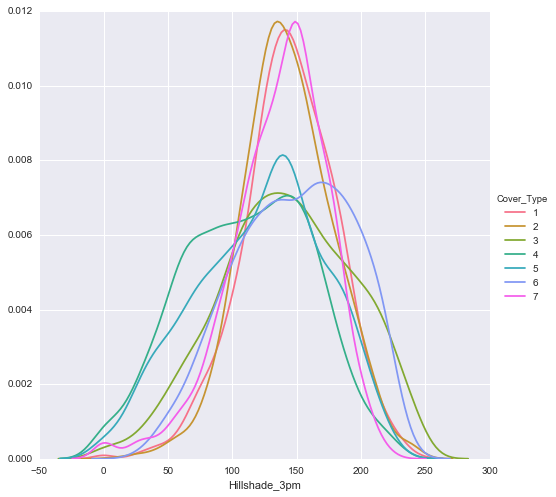

In [298]:
# Normal distributed for Hillshade_3pm of different cover types
sns.FacetGrid(trainData, hue='Cover_Type', size=7).map(sns.kdeplot, 'Hillshade_3pm').add_legend();

C:\Users\xinliu\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


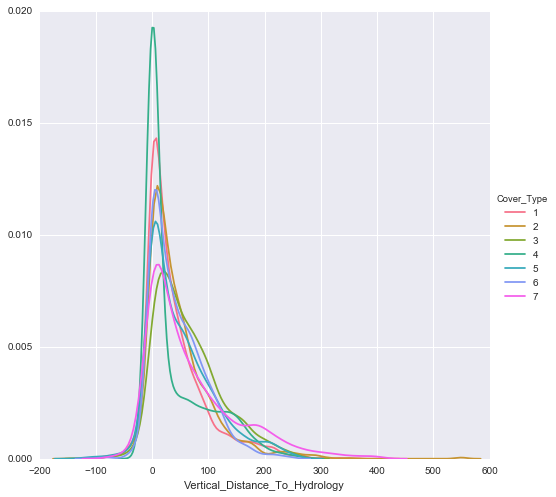

In [300]:
# Left Skewed distributed (lots of zeros) for Vertical_Distance_To_Hydrology of different cover types
sns.FacetGrid(trainData, hue='Cover_Type', size=7).map(sns.kdeplot, 'Vertical_Distance_To_Hydrology').add_legend();

Apart from categorical variable, we might want to see some binary variables

C:\Users\xinliu\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


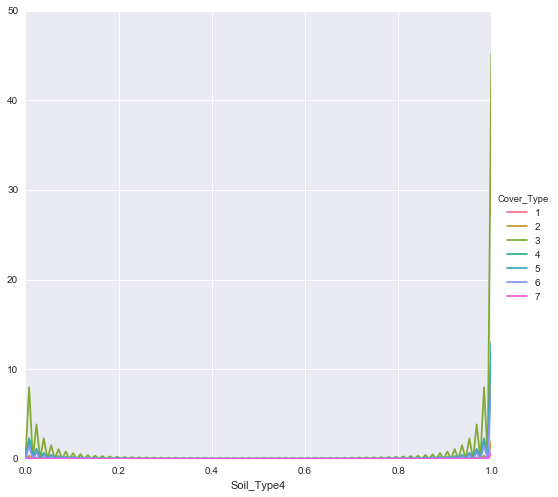

In [301]:
# as the kdeplot can't clearly show the absence/presence on influencing cover_type, we might want to see the violinplot
sns.FacetGrid(trainData, hue='Cover_Type', size=7).map(sns.kdeplot, 'Soil_Type4').add_legend();

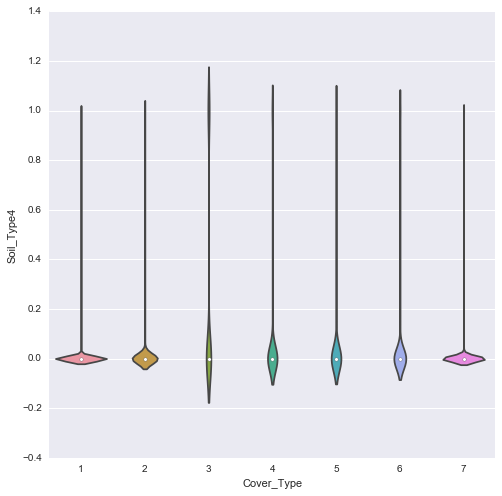

In [306]:
# this mean for variate 'Soil_Type4', they are more or less presented in all cover types
plt.figure(figsize=(8,8))
sns.violinplot(data = trainData, x = 'Cover_Type', y='Soil_Type4');

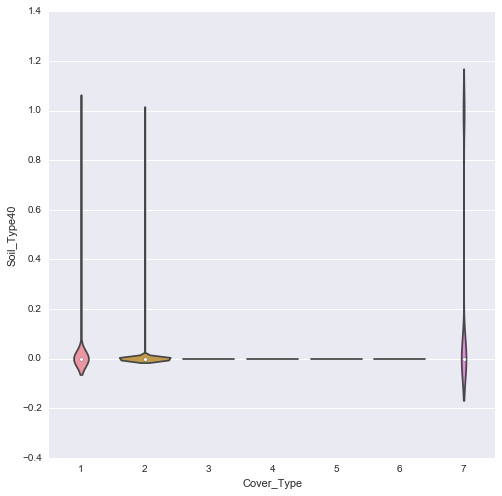

In [307]:
# this mean for variate 'Soil_Type40', they are only presented in cover type 1,2 and 7 with different times
plt.figure(figsize=(8,8))
sns.violinplot(data = trainData, x = 'Cover_Type', y='Soil_Type40');

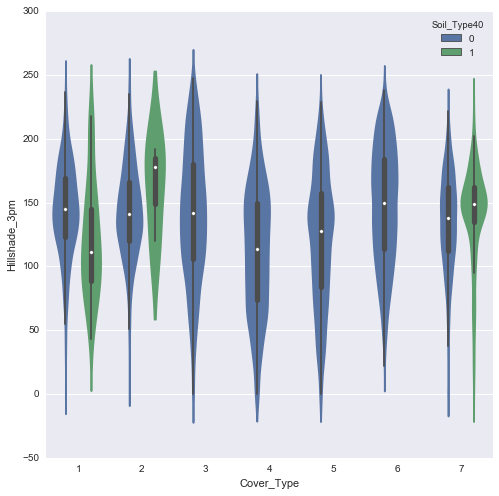

In [309]:
plt.figure(figsize=(8,8))
sns.violinplot(data = trainData, x = 'Cover_Type', y = 'Hillshade_3pm', hue = 'Soil_Type40');

# Data Visualization

## Grouping of One hot encoded attributes

In [51]:
print(trainData.columns[10:14])
print(trainData.columns[14:52])

Index(['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4'],
      dtype='object')
Index(['Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11',
       'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40'],
      dtype='object')


In [68]:
trainX = trainData.iloc[:,0:-1]
trainX_rowNum, trainX_colNum = trainX.shape

trainX_OneHotEncoder = np.zeros((trainX_rowNum, 3,)).astype(np.int64)

for n in np.arange(0,trainX_rowNum):
    for i in np.arange(10,14):
        if trainX.iloc[n, i] == 1:
            trainX_OneHotEncoder[n, 0] = i - 9
            break
    for j in np.arange(14,52):
        if trainX.iloc[n, j] == 1:
            trainX_OneHotEncoder[n, 1] = j - 13
            break
    trainX_OneHotEncoder[n, 2] = trainData.iloc[n, -1]

In [73]:
trainX_OneHotEncoder_DF = pd.DataFrame(data = trainX_OneHotEncoder, columns=['Wilderness_Area','Soil_Type','Cover_Type'])

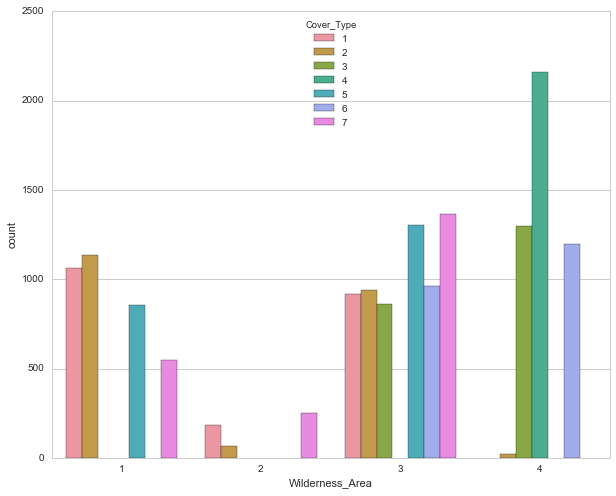

In [79]:
plt.figure(figsize=(10,8))
sns.countplot(x ='Wilderness_Area', hue='Cover_Type', data=trainX_OneHotEncoder_DF);

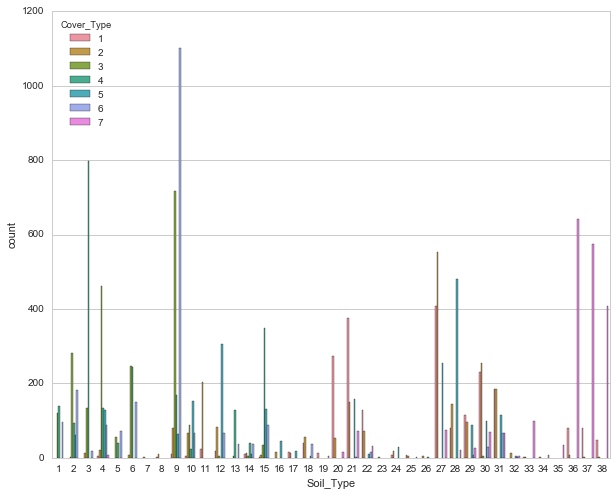

In [80]:
plt.figure(figsize=(10,8))
sns.countplot(x ='Soil_Type', hue='Cover_Type', data=trainX_OneHotEncoder_DF);


# data preprocessing

In [88]:
# we first split the data into training set and validation set
from sklearn.cross_validation import train_test_split

valid_size = 0.1
seed = 1
xtrain, xvalid, ytrain, yvalid = train_test_split(trainX.values, trainData['Cover_Type'], \
                                                  test_size = valid_size, random_state=seed)

In [274]:
colName_data = trainX.columns

In [260]:
# create a list to store all data (train and validation), standardization method used (only applied to categorical data),
# data store as entire standardized data, standardized training data and standardized validation data
# proportion top important features we want to keep, and the name and index of features we want to keep
# the name and index of features we discard 
dataStandz_featSelect_Info = []

# create a list to store index of features in data
idx_columns = []
for i in np.arange(len(trainX.columns)):
    idx_columns.append(i)
    
# create a list to store rank of features
rank_list = []

# create a list to store name of features kept
colName_select_list = []

# create a list to store index of features kept
colIdx_select_list = []

# create a list to store name of feature discard
colName_remove_list = []

# create a list to store index of features discard
colIdx_remove_list = []

# append to the highest level of list
dataStandz_featSelect_Info.append(['Orig', 'All', xtrain, xvalid, 1.0, colName, \
                                   rank_list, colName_select_list, colName_remove_list,\
                                   colIdx_select_list, colIdx_remove_list])

In [261]:
# create a list to indicate which method we use to feature selection
# and the proportion top rank important features selected

featselect_method_propFeat = []
#featselect_method_propFeat.append(['None + %i%% important feautres' %(100)])

# method: [EXTree, RnF, GBoost, XGB]
# proportion: [0.75, 0.5, 0.25]
propVals = [0.75, 0.5, 0.25]
methods  = ['EXTree', 'RnF', 'GBoost', 'XGB']

for method in methods:
    for propVal in propVals:
        featselect_method_propFeat.append([method+' + %i%%' %(100*propVal), propVal])
        #print(method+' + %i%%' %(100*propVal))

In [262]:
featselect_method_propFeat[0][1]

0.75

### Standardization (only for categorical variables) by using three ways

StandardScaler():

http://scikit-learn.org/stable/modules/preprocessing.html

StandardScaler: The preprocessing module further provides a utility class StandardScaler that implements the Transformer API to compute the mean and standard deviation on a training set (transfer to a standard normal distrbution) so as to be able to later reapply the same transformation on the testing set.

After transformation, the data x can be x in range [-neg val, pos val] or [-neg val, -neg val] or [pos val, pos val]

In [263]:
from sklearn.preprocessing import StandardScaler

# define the size of categorical variables
size_categoric_var = 10

In [264]:
xtrain_categoric_stand = StandardScaler().fit_transform(xtrain[:, 0:size_categoric_var])
xvalid_categoric_stand = StandardScaler().fit_transform(xvalid[:, 0:size_categoric_var])

# concatenate to the rest binary features
xtrain_stand = np.hstack((xtrain_categoric_stand, xtrain[:, size_categoric_var:]))
xvalid_stand = np.hstack((xvalid_categoric_stand, xvalid[:, size_categoric_var:]))

# push to the dataStandz_featSelect_Info list
dataStandz_featSelect_Info.append(['StandardScaler', 'All', xtrain_stand, xvalid_stand, 1.0, colName, \
                                   rank_list, colName_select_list, colName_remove_list,\
                                   colIdx_select_list, colIdx_remove_list])

MinMaxScaler: An alternative standardization is scaling features to lie between a given minimum and maximum value, often between zero and one, or so that the maximum absolute value of each feature is scaled to unit size. This can be achieved using MinMaxScaler or MaxAbsScaler, respectively. The motivation to use this scaling include robustness to very small standard deviations of features and preserving zero entries in sparse data.

After transformation, the data x can be x in range [0,1]

In [265]:
from sklearn.preprocessing import MinMaxScaler

xtrain_categoric_MinMax = MinMaxScaler().fit_transform(xtrain[:, 0:size_categoric_var])
xvalid_categoric_MinMax = MinMaxScaler().fit_transform(xvalid[:, 0:size_categoric_var])

# concatenate to the rest binary features
xtrain_MinMax = np.hstack((xtrain_categoric_MinMax, xtrain[:, size_categoric_var:]))
xvalid_MinMax = np.hstack((xvalid_categoric_MinMax, xvalid[:, size_categoric_var:]))

# push to the dataStandz_featSelect_Info list
dataStandz_featSelect_Info.append(['MinMaxScaler', 'All', xtrain_MinMax, xvalid_MinMax, 1.0, colName, \
                                   rank_list, colName_select_list, colName_remove_list,\
                                   colIdx_select_list, colIdx_remove_list])

normalize: (has norm value to be one after transformation) Normalization is the process of scaling individual samples to have unit norm. This process can be useful if you plan to use a quadratic form such as the dot-product or any other kernel to quantify the similarity of any pair of samples.
This assumption is the base of the Vector Space Model often used in text classification and clustering contexts.
The function normalize provides a quick and easy way to perform this operation on a single array-like dataset, either using the l1 or l2 norms: The preprocessing module further provides a utility class Normalizer that implements the same operation using the Transformer API (even though the fit method is useless in this case: the class is stateless as this operation treats samples independently).

In [266]:
from sklearn.preprocessing import Normalizer

xtrain_categoric_Normalizer = Normalizer().fit_transform(xtrain[:, 0:size_categoric_var])
xvalid_categoric_Normalizer = Normalizer().fit_transform(xvalid[:, 0:size_categoric_var])

# concatenate to the rest binary features
xtrain_Normalizer = np.hstack((xtrain_categoric_Normalizer, xtrain[:, size_categoric_var:]))
xvalid_Normalizer = np.hstack((xvalid_categoric_Normalizer, xvalid[:, size_categoric_var:]))

# push to the dataStandz_featSelect_Info list
dataStandz_featSelect_Info.append(['Normalizer', 'All', xtrain_Normalizer, xvalid_Normalizer, 1.0, colName, \
                                   rank_list, colName_select_list, colName_remove_list,\
                                   colIdx_select_list, colIdx_remove_list])

# Feature Selection

### Embedded methods: we use four methods belonging to embedded feature selection type method
1. ExtraTrees
2. Random Forest
3. Gradient Boosting
4. XGBoost

In [267]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [268]:
featselect_method_propFeat

[['EXTree + 75%', 0.75],
 ['EXTree + 50%', 0.5],
 ['EXTree + 25%', 0.25],
 ['RnF + 75%', 0.75],
 ['RnF + 50%', 0.5],
 ['RnF + 25%', 0.25],
 ['GBoost + 75%', 0.75],
 ['GBoost + 50%', 0.5],
 ['GBoost + 25%', 0.25],
 ['XGB + 75%', 0.75],
 ['XGB + 50%', 0.5],
 ['XGB + 25%', 0.25]]

In [269]:
models = []
for method in methods:
    for propVal in propVals:
        if method == 'EXTree':
            model = ExtraTreesClassifier(n_estimators=trainX_colNum, max_features=int(propVal*trainX_colNum),random_state=seed)
        elif method == 'RnF':
            model = RandomForestClassifier(n_estimators=trainX_colNum, max_features=int(propVal*trainX_colNum),random_state=seed)
        elif method == 'GBoost':
            model = GradientBoostingClassifier(n_estimators=trainX_colNum, max_features=int(propVal*trainX_colNum),random_state=seed)
        elif method == 'XGB':
            model = XGBClassifier(n_estimators=trainX_colNum, seed=seed)
        models.append(model)

fit models and perform feature selection and rank feature importance

In [276]:
# create a list to store all feature ranks under different method and standardization, and data used
featureRank_data_List = []

# use data obtained ranged from its original to three types standardization
for standardTrans, allDataIndicator, \
    xtrain, xvalid, _, colName, rank_list, \
    colName_select_list, colName_remove_list, colIdx_select_list, colIdx_remove_list in dataStandz_featSelect_Info:
        
        # loop over all models and all proportion important features we want to keep
        for [modelName, val], model in list(zip(featselect_method_propFeat, models)): 
            print(modelName)
            m = model.fit(xtrain, ytrain)
            
            # create a list to store the feature importances and their corresponding name
            varImgList = []
            for n, varImg in enumerate(m.feature_importances_):
                #print(n)
                a = n
                b = colName_data[n]
                c = varImg
                varImgList.append([n, colName_data[n], varImg])
                
            # sort the feature importance list, rank in descending order
            varImgList_sort = sorted(varImgList, key = lambda x: -x[2])
            
            # how many top important features we will keep
            numImpFeatKeep = int(val * trainX_colNum)
            
            #Ranking of all the columns
            rank_list =[]
            
            # we store the column name and index of features we want to select/remove
            colName_select_list = []
            colName_remove_list = []
            colIdx_select_list  = []
            colIdx_remove_list  = []
            
            # Top 75%, 50% and 25% important features we want to 
            for rankOrder, (colIdx, colName, varImg) in enumerate(varImgList_sort):
                # store the rank of eahc feature
                rank_list.append([colIdx, rankOrder])
                if rankOrder < numImpFeatKeep:
                    colName_select_list.append(colName)
                    colIdx_select_list.append(colIdx)
                else:
                    colName_remove_list.append(colName)
                    colIdx_remove_list.append(colIdx)
            
            # Sort the rank_list and store only the ranks. Drop the index 
            # Append model name, array, columns selected and columns to be removed to the additional list
            featureRank_data_List.append([standardTrans, modelName, xtrain, xvalid, val, \
                                          [x[1] for x in sorted(rank_list, key=lambda x:x[0])],\
                                   colIdx_select_list, colIdx_remove_list])
                

EXTree + 75%
EXTree + 50%
EXTree + 25%
RnF + 75%
RnF + 50%
RnF + 25%
GBoost + 75%
GBoost + 50%
GBoost + 25%
XGB + 75%
XGB + 50%
XGB + 25%
EXTree + 75%
EXTree + 50%
EXTree + 25%
RnF + 75%
RnF + 50%
RnF + 25%
GBoost + 75%
GBoost + 50%
GBoost + 25%
XGB + 75%
XGB + 50%
XGB + 25%
EXTree + 75%
EXTree + 50%
EXTree + 25%
RnF + 75%
RnF + 50%
RnF + 25%
GBoost + 75%
GBoost + 50%
GBoost + 25%
XGB + 75%
XGB + 50%
XGB + 25%
EXTree + 75%
EXTree + 50%
EXTree + 25%
RnF + 75%
RnF + 50%
RnF + 25%
GBoost + 75%
GBoost + 50%
GBoost + 25%
XGB + 75%
XGB + 50%
XGB + 25%


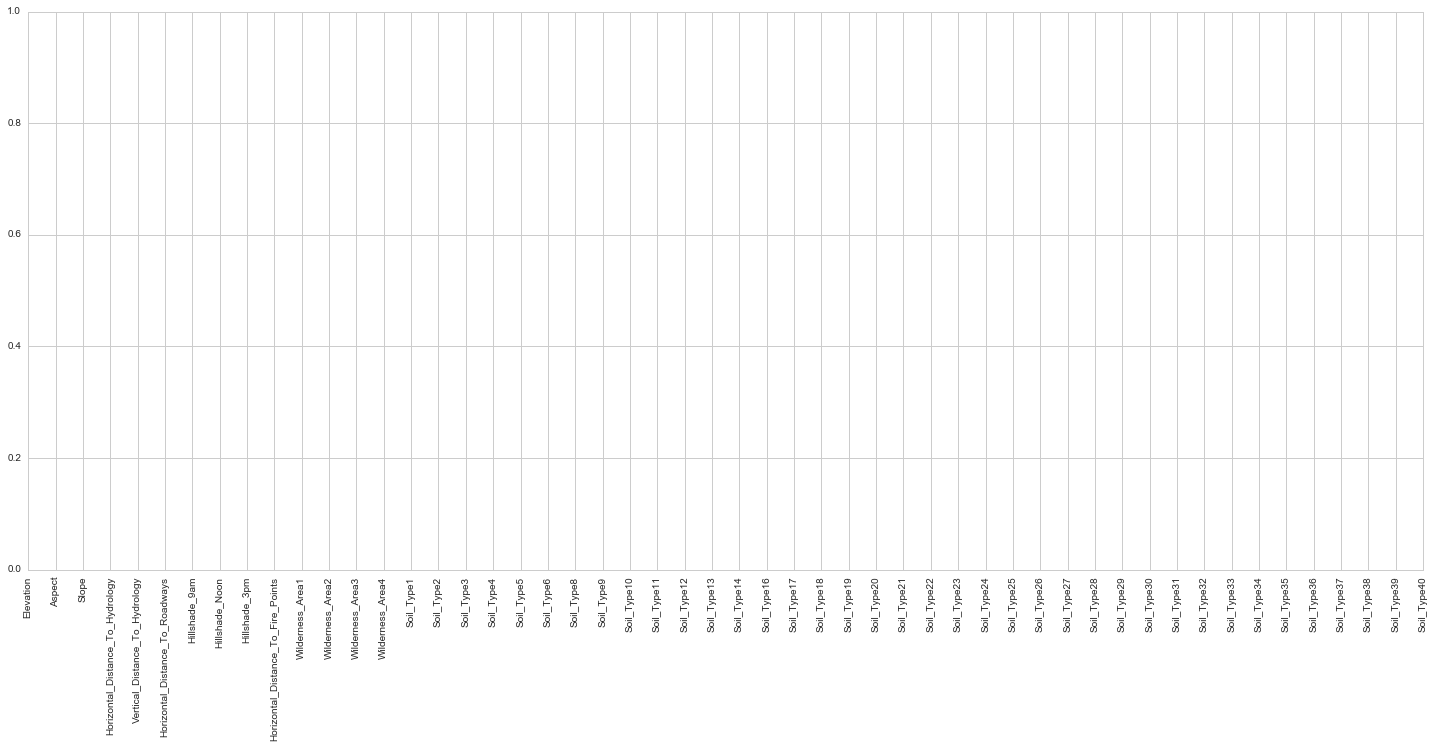

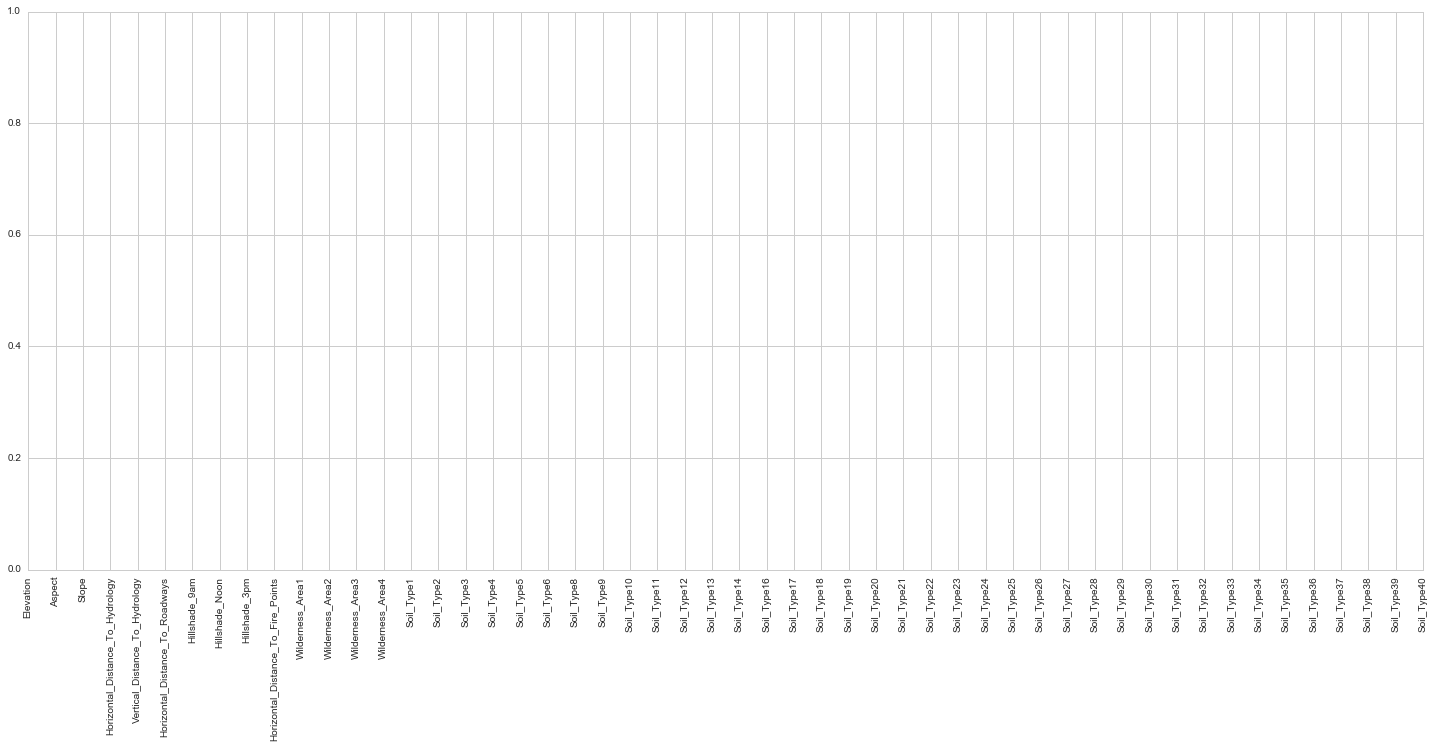

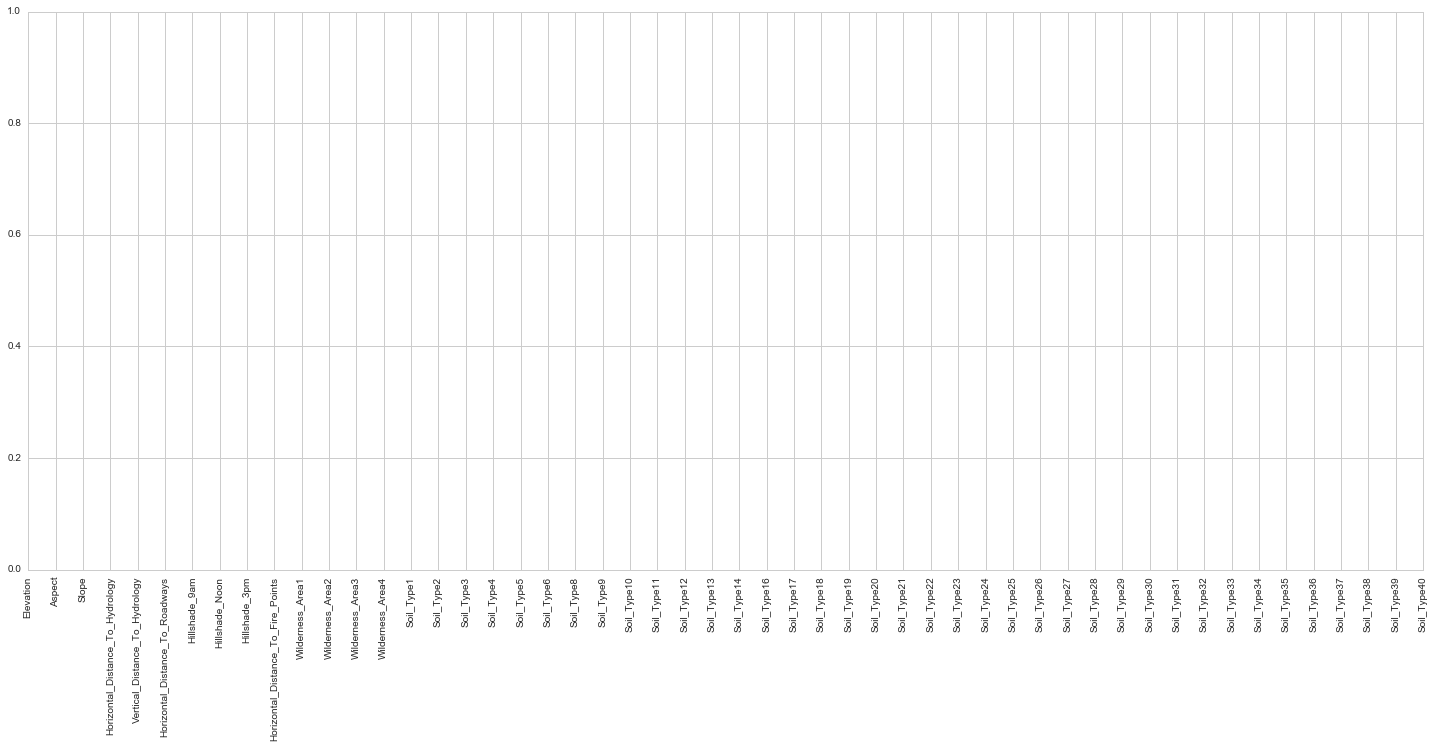

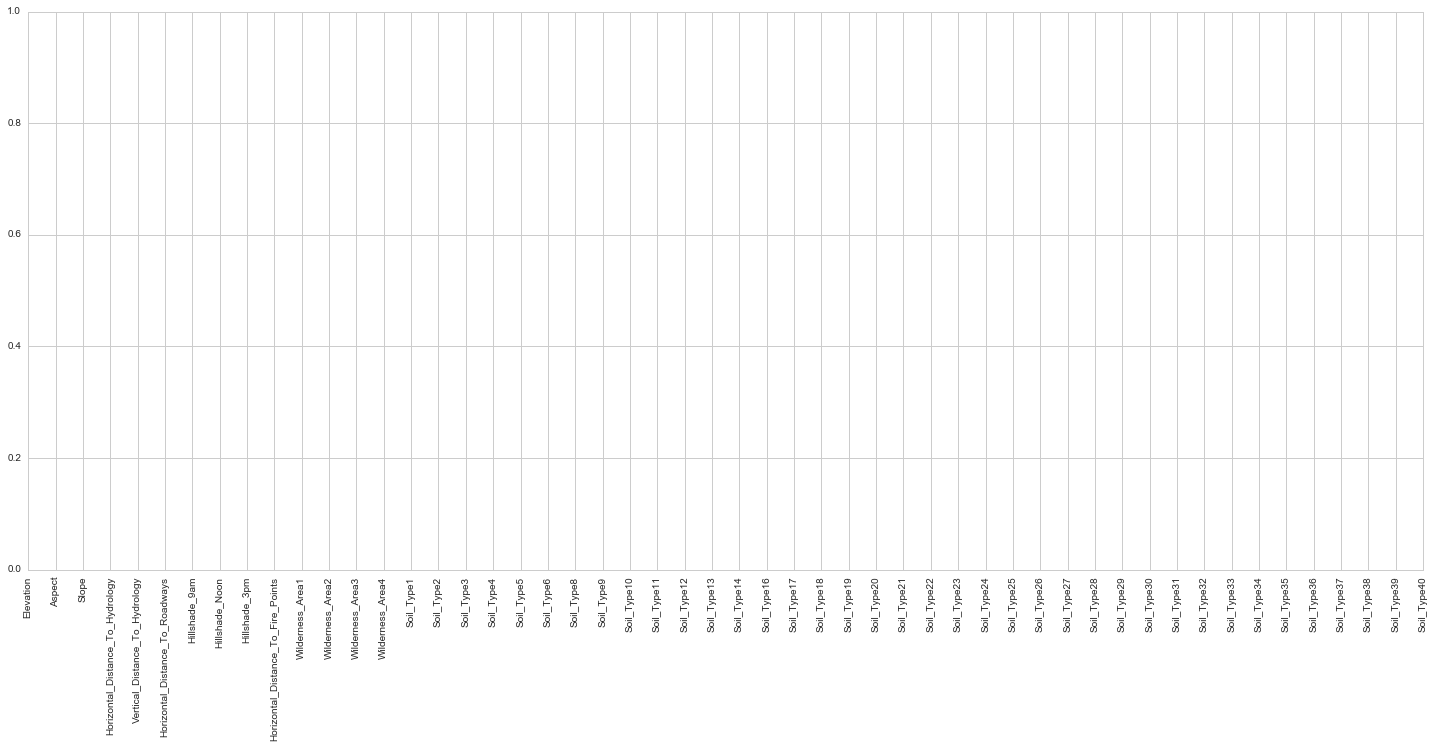

In [285]:
#Set figure size
plt.rc("figure", figsize=(25, 10))

#Plot a graph for different feature selectors        
for model in ['EXTree','RnF','GBoost','XGB']:
    #Array to store the list of combinations
    leg=[]
    fig, ax = plt.subplots()
    #Plot each combination
    for trans, modelName, X, X_val, v, rank_list, i_cols_list, i_rem_list in featureRank_data_List:
        if(modelName == model):
            plt.plot(rank_list)
            leg.append(trans+"+"+modelName+"+%s"% v)
    #Set the tick names to names of columns
    ax.set_xticks(np.arange(len(colName_data)))
    ax.set_xticklabels(colName_data,rotation='vertical')
    #Display the plot
    plt.legend(leg,loc='best')    
    #Plot the rankings of all the features for all combinations

In [ ]:
            featureRank_data_List.append([standardTrans, modelName, xtrain, xvalid, val, \
                                          [x[1] for x in sorted(rank_list, key=lambda x:x[0])],\
                                   colIdx_select_list, colIdx_remove_list])

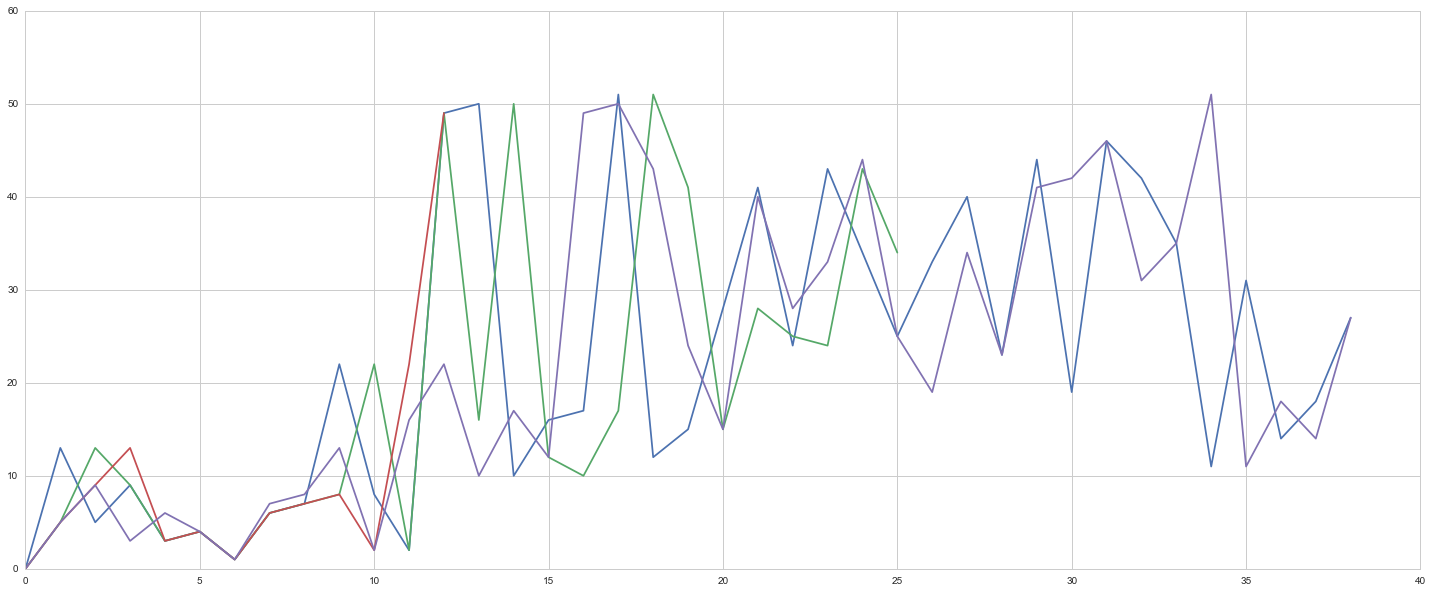

In [288]:
plt.plot(featureRank_data_List[0][6])
plt.plot(featureRank_data_List[1][6])
plt.plot(featureRank_data_List[2][6])
plt.plot(featureRank_data_List[3][6])

In [289]:
len(featureRank_data_List)

48